In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [7]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [18]:

# Replace empty strings with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['TotalCharges'] = imputer.fit_transform(data['TotalCharges'].values.reshape(-1, 1))


In [26]:


# Handle missing values

imputer = SimpleImputer(strategy='constant', fill_value=0)
data['TotalCharges'] = imputer.fit_transform(data['TotalCharges'].values.reshape(-1, 1))
# Drop rows with missing values
try:
    data.dropna(subset=['TotalCharges'], inplace=True)
except ValueError:
    print(f"ValueError occurred: {e}")





# Perform data cleaning and normalization
data['tenure'] = data['tenure'].astype(int)
data['MonthlyCharges'] = data['MonthlyCharges'].astype(float)

# Scale the features
scaler = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [27]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.477011,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994971,No
1,5575-GNVDE,Male,0,No,No,-0.013095,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173876,No
2,3668-QPYBK,Male,0,No,No,-1.477011,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,Yes
3,7795-CFOCW,Male,0,No,No,-0.013095,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195400,No
4,9237-HQITU,Female,0,No,No,-1.477011,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.941193,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,-0.013095,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.665992,-0.129281,No
7039,2234-XADUH,Female,0,Yes,Yes,1.450821,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.277533,2.242808,No
7040,4801-JZAZL,Female,0,Yes,Yes,-0.013095,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.168632,-0.855182,No
7041,8361-LTMKD,Male,1,Yes,No,-1.477011,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,0.320338,-0.872777,Yes


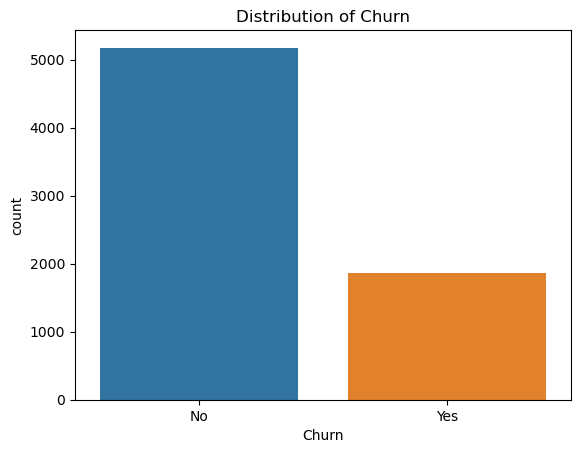

/tmp/ipykernel_32/62313070.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


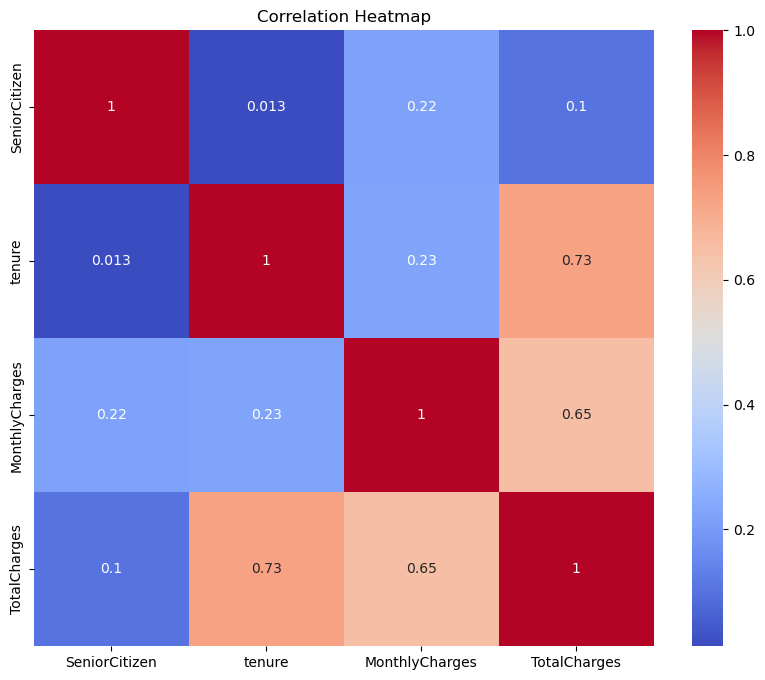

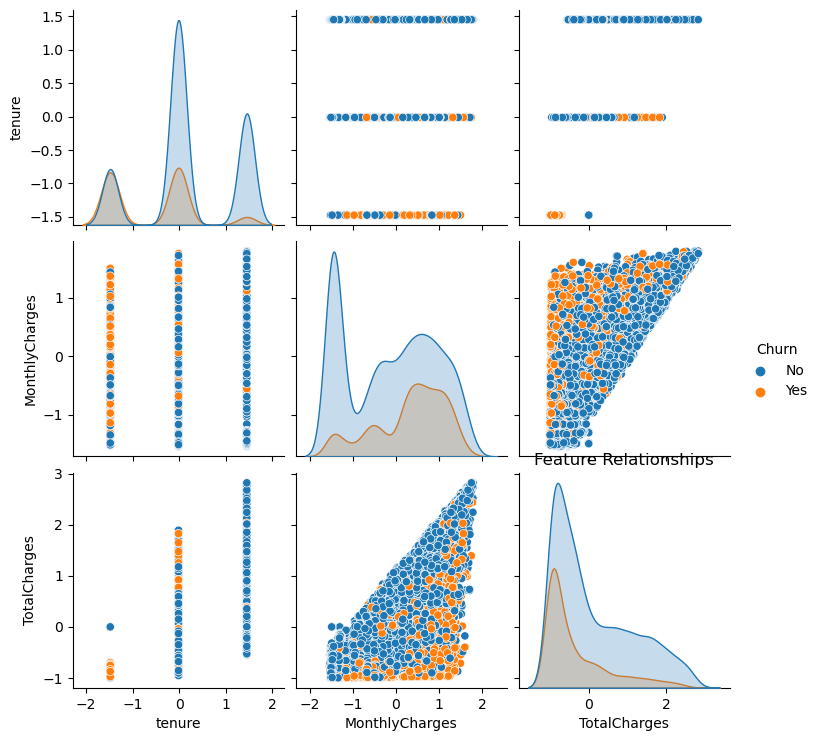

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of target variable
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Explore feature relationships
sns.pairplot(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.title('Feature Relationships')
plt.show()


In [50]:
from sklearn.preprocessing import OneHotEncoder

# Identify non-numerical columns
non_numeric_cols = data.select_dtypes(exclude='number').columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform non-numerical columns
data_encoded = encoder.fit_transform(data[non_numeric_cols])

# Convert encoded data to DataFrame and concatenate with numerical columns
data_encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(non_numeric_cols))
data_final = pd.concat([data.drop(columns=non_numeric_cols), data_encoded_df], axis=1)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
data=data_final

In [52]:
data_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,MonthlyCharges_Tenure,TotalCharges_Tenure,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.477011,-1.160323,-0.994971,0,0,0,0,0,1.713810,1.469584,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,-0.013095,-0.259629,-0.173876,1,0,0,1,0,0.003400,0.002277,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,-1.477011,-0.362660,-0.960399,1,0,0,0,0,0.535653,1.418521,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,-0.013095,-0.746535,-0.195400,1,0,0,1,0,0.009776,0.002559,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-1.477011,0.197365,-0.941193,0,1,0,0,0,-0.291511,1.390152,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.013095,0.665992,-0.129281,1,0,0,1,0,-0.008721,0.001693,1.0,1.0,1.0,0.0,0.0,1.0,0.0
7039,0,1.450821,1.277533,2.242808,0,1,0,1,0,1.853473,3.253914,1.0,1.0,1.0,1.0,0.0,0.0,0.0
7040,0,-0.013095,-1.168632,-0.855182,0,0,0,0,0,0.015303,0.011198,1.0,1.0,1.0,0.0,1.0,0.0,0.0
7041,1,-1.477011,0.320338,-0.872777,1,1,0,0,0,-0.473143,1.289102,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [55]:
data


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,MonthlyCharges_Tenure,TotalCharges_Tenure,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.477011,-1.160323,-0.994971,0,0,0,0,0,1.713810,1.469584,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,-0.013095,-0.259629,-0.173876,1,0,0,1,0,0.003400,0.002277,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,-1.477011,-0.362660,-0.960399,1,0,0,0,0,0.535653,1.418521,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,-0.013095,-0.746535,-0.195400,1,0,0,1,0,0.009776,0.002559,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-1.477011,0.197365,-0.941193,0,1,0,0,0,-0.291511,1.390152,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.013095,0.665992,-0.129281,1,0,0,1,0,-0.008721,0.001693,1.0,1.0,1.0,0.0,0.0,1.0,0.0
7039,0,1.450821,1.277533,2.242808,0,1,0,1,0,1.853473,3.253914,1.0,1.0,1.0,1.0,0.0,0.0,0.0
7040,0,-0.013095,-1.168632,-0.855182,0,0,0,0,0,0.015303,0.011198,1.0,1.0,1.0,0.0,1.0,0.0,0.0
7041,1,-1.477011,0.320338,-0.872777,1,1,0,0,0,-0.473143,1.289102,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the data into train and test sets
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.80
Precision: 0.65
Recall: 0.52
F1-Score: 0.58
